Exercício imagens tumores
=========================

# Classificação - Dados tabulares

**Exercício: Classificação se um paciente possui diabetes**

**Arquivo diabetes.csv**

**Passos:**

1. Carregue o conjunto de dados em um DataFrame usando a biblioteca pandas.
2. Explore e visualize os dados para entender suas características.
3. Divida os dados em recursos (X) e rótulos (y).
4. Divida o conjunto de dados em conjuntos de treinamento e teste.
5. Utilização de redes neurais scikit-learn `MLPClassifier`:
   1. Inicialize o modelo de redes neurais.
   2. Treine o modelo usando o conjunto de treinamento.
   3. Faça previsões usando o conjunto de teste.
   4. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.
6. Utilização de redes neurais keras `Sequential`:
   1. Inicialize o modelo de redes neurais.
   2. Divida o treino em conjuntos de treinamento e validação.
   3. Treine o modelo usando o conjunto de treinamento e valide utilizando o conjunto de validação.
   4. Verifique se houve overfitting
   5. Faça previsões usando o conjunto de teste.
   6. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.  
7. Utilização do Random Forest `RandomForestClassifier`:
   1. Inicialize o modelo de Ensemble de árvore.
   2. Treine o modelo usando o conjunto de treinamento.
   3. Faça previsões usando o conjunto de teste.
   4. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.
8. Utilização do XGBoost `XGBClassifier`:
   1. Inicialize o modelo de Ensemble de árvore.
   2. Treine o modelo usando o conjunto de treinamento.
   3. Faça previsões usando o conjunto de teste.
   4. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.
   5. Verifique a importância dos atributos.

# Classificação - Imagem

**Classificação de tipos de tumores**

**Imagens na pasta Datasets/Exercicio_Tumores**

**Passos:**

1. Carregue o conjunto de imagens.
2. Realize o pre processamento.
3. Divida os dados em recursos (X) e rótulos (y).
4. Divida o conjunto de dados em conjuntos de treinamento, validação e teste.
5. Treinamento: 
   1. Definição de arquitetura:
      1. Definir quantas camadas são necessárias para o problema
      2. A quantidade de neurônios em cada camada.
      3. A função de ativação de cada camada.
      4. Regularização - dropout.
      5. A função de ativação da saída.
         * softmax (saída não binária).
         * sigmoid (saída binária).
   2. `.compile`: Definição dos otimizadores.
   3. Regularização - earlystop.
   4. `.fit`: Adicionar conjuntos de treinamento e validação; e determinar a quantidade de épocas.
6. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc. 

# Prática - Tumor

In [77]:
%load_ext autoreload
%autoreload 2

import sys 

sys.path.insert(1, '../')

import numpy as np
from src.plot import plot_heatmap
from src.train import get_all_subsets, results_regression
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

import pathlib
import cv2
import os
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### 1. Aquisição dos dados


In [78]:
path = '../../Datasets/Exercicio_Tumores'
data = pathlib.Path(path)

In [79]:
data

WindowsPath('../../Datasets/Exercicio_Tumores')

In [80]:
list(data.glob('*/*.jpg'))[:5]

[WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_1.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_10.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_100.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_101.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_102.jpg')]

In [81]:
list(data.glob('glioma_tumor/*.jpg'))[:5]

[WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_1.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_10.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_100.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_101.jpg'),
 WindowsPath('../../Datasets/Exercicio_Tumores/glioma_tumor/G_102.jpg')]

In [82]:
disease = {
    "glioma_tumor": list(data.glob('glioma_tumor/*.jpg')),
    "meningioma_tumor": list(data.glob('meningioma_tumor/*.jpg')),
    "normal": list(data.glob('normal/*.jpg')),
    "pituitary_tumor" : list(data.glob('pituitary_tumor/*.jpg')),       
}

In [83]:
disease.keys()

dict_keys(['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor'])

In [84]:
labels = {
    "glioma_tumor" : 0,
    "meningioma_tumor": 1,
    "normal": 2,
    "pituitary_tumor": 3
}

In [85]:
os.listdir(path)

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

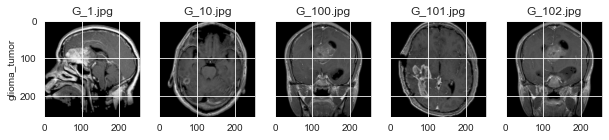

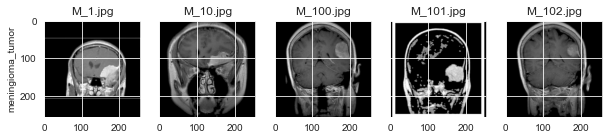

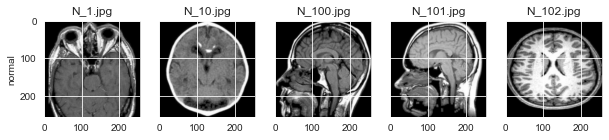

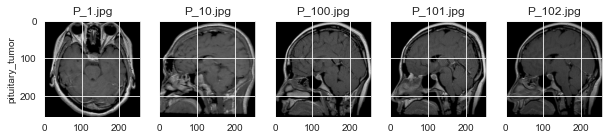

In [86]:
directory = os.listdir(path)

for each in disease.keys():
    plt.figure(figsize=(10, 10))
    currentFolder = path + '/' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = path + '/' + each + "/" + file
        img=cv2.imread(fullpath)
        ax=plt.subplot(1,5,i+1)
        ax.set_title(file)
        if(i == 0):
            ax.set_ylabel(each)
        else:
            ax.set_yticklabels([])
        plt.imshow(img)

## Carregamento dos dados

In [87]:
X = []
Y = []
for name, diseases in disease.items():
    for disease in diseases:
        img = cv2.imread(str(disease))
        img = img.astype('float32') / 255.0
        X.append(img)
        Y.append(labels[name])     

In [88]:
X = np.array(X)
Y = np.array(Y)

In [89]:
X_train, X_val, X_test, y_train, y_val, y_test = get_all_subsets(X, Y)

In [90]:
print('X_train: ', X_train.shape)
print('X_val: ', X_val.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_val: ', y_val.shape)
print('y_test: ', y_test.shape)

X_train:  (1980, 256, 256, 3)
X_val:  (496, 256, 256, 3)
X_test:  (620, 256, 256, 3)
y_train:  (1980,)
y_val:  (496,)
y_test:  (620,)


In [91]:
hot = OneHotEncoder()
y_train = hot.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_val = hot.fit_transform(np.array(y_val).reshape(-1, 1)).toarray()
y_test = hot.transform(np.array(y_test).reshape(-1, 1)).toarray()

In [97]:
seq = Sequential()
seq.add(Flatten())
seq.add(Dense(512,  input_shape = (None, 256, 256)))
seq.add(Activation('relu'))
seq.add(Dropout(0.3))
seq.add(Dense(256))
seq.add(Activation('relu'))
seq.add(Dense(128))
seq.add(Dropout(0.3))
seq.add(Activation('relu'))
seq.add(Dense(64))
seq.add(Activation('relu'))
seq.add(Dense(4))
seq.add(Activation('softmax'))

seq.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [98]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

In [99]:
historico = seq.fit(X_train, 
                             y_train, 
                             epochs = 50, 
                             verbose = 1,
                             validation_data = (X_val, y_val),
                             callbacks = [es])

Epoch 1/50
 8/62 [==>...........................] - ETA: 1:45 - loss: 19.6310 - accuracy: 0.2656

KeyboardInterrupt: 